In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from six.moves import urllib

import tensorflow as tf

import os
os.environ['CUDA_VISIBLE_DEVICES']='0'
sess = tf.InteractiveSession()

IMG_URL = 'http://www.005.tv/uploads/allimg/170216/22-1F216140021P5.jpg'
# IMG_URL = 'http://lodev.org/cgtutor/images/photo3.jpg'
IMG_FILENANE = 'pic'

In [2]:
print('downloading %s to %s' % (IMG_URL, IMG_FILENANE))
urllib.request.urlretrieve(IMG_URL, IMG_FILENANE)

downloading http://www.005.tv/uploads/allimg/170216/22-1F216140021P5.jpg to pic


('pic', <httplib.HTTPMessage instance at 0x7f5133f775f0>)

In [3]:
def report_image(img):
    print("width: %d, height: %d, channel: %d" % img.shape)
    return img.shape

width: 1096, height: 700, channel: 3


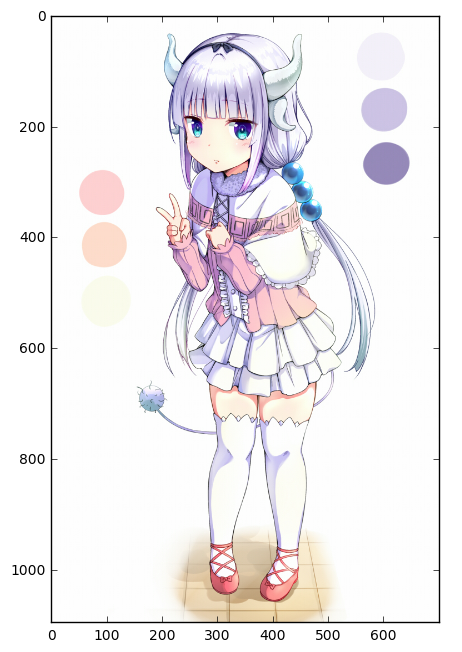

In [4]:
img=mpimg.imread(IMG_FILENANE)
width, height, channel = report_image(img)
plt.figure(figsize=(5, 10.0*width/height))
imgplot = plt.imshow(img)

In [5]:
img_ts = tf.constant(img, dtype=tf.float32)
img_ts = tf.expand_dims(img_ts, 0)

# Blur

width: 1096, height: 700, channel: 3


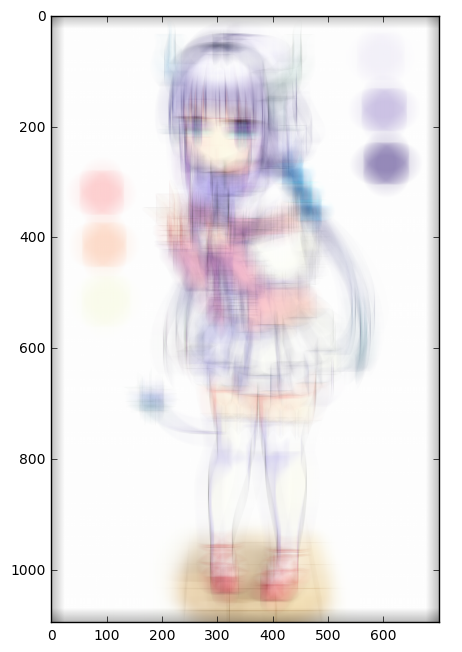

In [6]:
filter = np.zeros([50, 50, channel, channel])
for c in range(channel):
    filter[24, :, c, c] = 1.0 / 99
    filter[:, 24, c, c] = 1.0 / 99
filter_ts = tf.constant(filter, dtype=tf.float32)

img_new_ts = tf.nn.conv2d(img_ts, filter, [1, 1, 1, 1], 'SAME')
img_new = sess.run(img_new_ts)[0].astype(np.uint8)

plt.figure(figsize=(5, 10.0*width/height))
report_image(img_new)
imgplot = plt.imshow(img_new)

# Motion Blur

width: 1096, height: 700, channel: 3


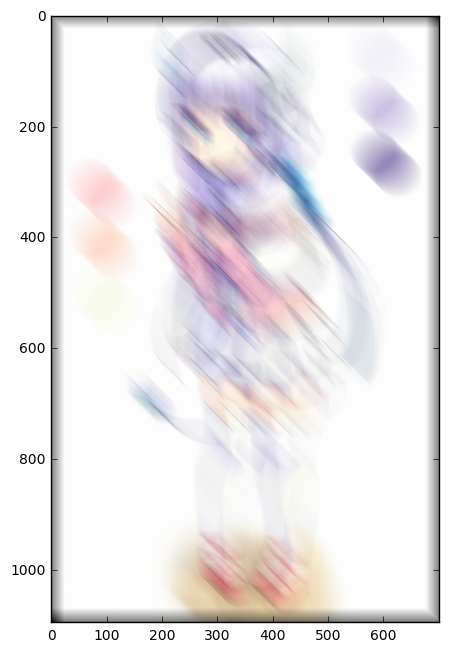

In [7]:
filter = np.zeros([50, 50, channel, channel])
for c in range(channel):
    filter[:, :, c, c] = np.eye(50) / 50.0
filter_ts = tf.constant(filter, dtype=tf.float32)

img_new_ts = tf.nn.conv2d(img_ts, filter, [1, 1, 1, 1], 'SAME')
img_new = sess.run(img_new_ts)[0].astype(np.uint8)

plt.figure(figsize=(5, 10.0*width/height))
report_image(img_new)
imgplot = plt.imshow(img_new)

# Find Edge

width: 1094, height: 698, channel: 3


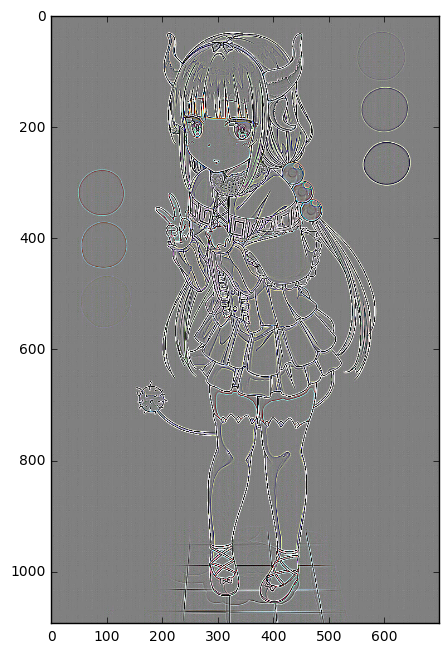

In [8]:
filter = np.zeros([3, 3, channel, channel])
for c in range(channel):
    filter[:, :, c, c] = -1
    filter[1, 1, c, c] = 8
filter_ts = tf.constant(filter, dtype=tf.float32)

img_new_ts = tf.nn.conv2d(img_ts, filter, [1, 1, 1, 1], 'VALID')
img_new = sess.run(img_new_ts)[0] + 128
img_new = np.minimum(np.maximum(img_new, 0), 255).astype(np.uint8)

plt.figure(figsize=(5, 10.0*width/height))
report_image(img_new)
imgplot = plt.imshow(img_new)

# Sharpen

width: 1094, height: 698, channel: 3


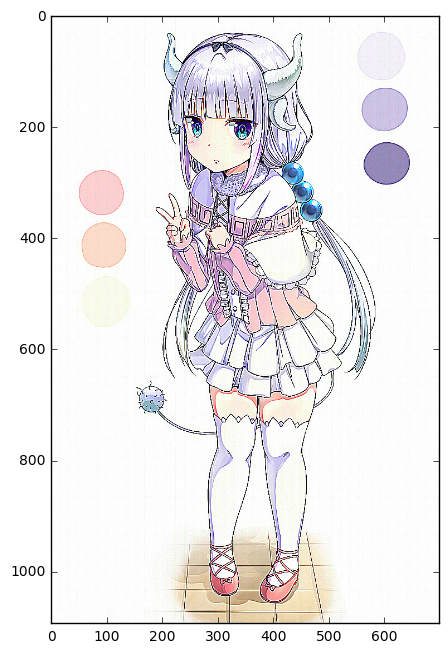

In [9]:
filter = np.zeros([3, 3, channel, channel])
for c in range(channel):
    filter[:, :, c, c] = -1
    filter[1, 1, c, c] = 9
filter_ts = tf.constant(filter, dtype=tf.float32)

img_new_ts = tf.nn.conv2d(img_ts, filter, [1, 1, 1, 1], 'VALID')
img_new = sess.run(img_new_ts)[0]
img_new = np.minimum(np.maximum(img_new, 0), 255).astype(np.uint8)

plt.figure(figsize=(5, 10.0*width/height))
report_image(img_new)
imgplot = plt.imshow(img_new)

# Emboss

width: 1094, height: 698, channel: 3


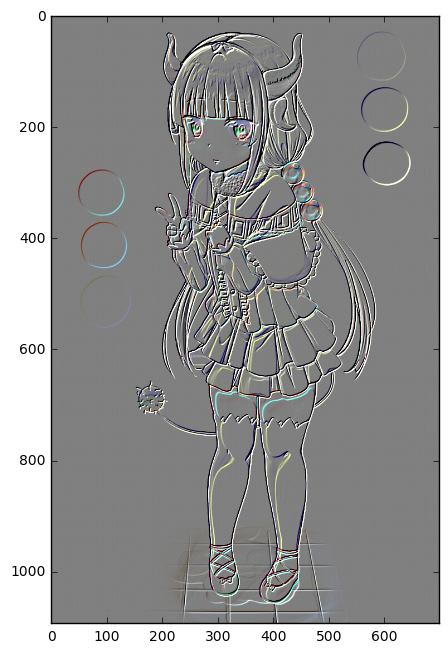

In [10]:
filter = np.zeros([3, 3, channel, channel])
for c in range(channel):
    filter[:, :, c, c] = [[-1, -1, 0],
                          [-1, 0, 1],
                          [0, 1, 1]]
filter_ts = tf.constant(filter, dtype=tf.float32)

img_new_ts = tf.nn.conv2d(img_ts, filter, [1, 1, 1, 1], 'VALID')
img_new = sess.run(img_new_ts)[0] + 128
img_new = np.minimum(np.maximum(img_new, 0), 255).astype(np.uint8)

plt.figure(figsize=(5, 10.0*width/height))
report_image(img_new)
imgplot = plt.imshow(img_new)